In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
gdp_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

In [3]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
...,...,...,...,...
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN


In [4]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

8219 rows, 4 columns, country is object, year is interger, calue and footnotes are floats

In [5]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [6]:
gdp_df = gdp_df.rename(columns = {'Country or Area' : 'Country', 'Year' : 'Year' , 'Value' : 'GDP_Per_Capita'})
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [7]:
not_all_year = gdp_df['Country'].value_counts()
not_all_year.head(230)

Country
Latvia                                34
North America                         34
Mongolia                              34
Morocco                               34
Mozambique                            34
                                      ..
Equatorial Guinea                     34
Grenada                               34
Europe & Central Asia (IDA & IBRD)    34
Bhutan                                33
Syrian Arab Republic                  33
Name: count, Length: 230, dtype: int64

In [8]:
not_all_year.tail(30)

Country
Fragile and conflict affected situations    34
Euro area                                   34
France                                      34
Gabon                                       34
Georgia                                     34
Germany                                     34
Ghana                                       34
Greece                                      34
Equatorial Guinea                           34
Grenada                                     34
Europe & Central Asia (IDA & IBRD)          34
Bhutan                                      33
Syrian Arab Republic                        33
Somalia                                     33
Tonga                                       33
Lebanon                                     33
Greenland                                   32
West Bank and Gaza                          30
Serbia                                      29
Montenegro                                  27
San Marino                                  26
CuraÃ

In [9]:
year_count = gdp_df['Year'].value_counts()

In [10]:
year_count = year_count.to_frame()

In [11]:
year_count.sort_values(by = 'Year', ascending = False)

,count
Year,
2023,240
2022,246
2021,247
2020,247
2019,247
2018,247
2017,247
2016,247
2015,247


count for 1990 is the lowest and from 2013 - 2021 it remained at the hightest count with 2022 and 2023 droping slightly

In [12]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


8) In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

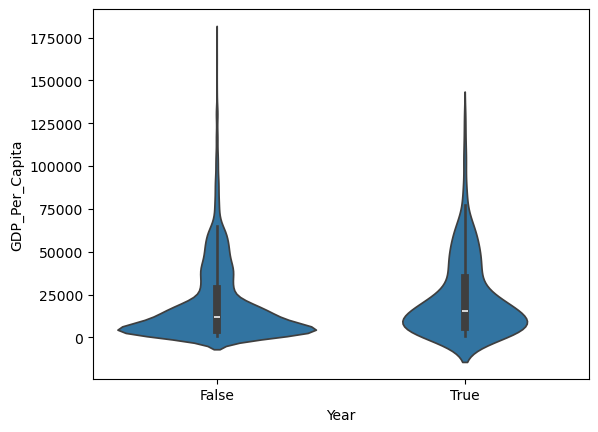

In [13]:
sns.violinplot(x=gdp_df["Year"] == 2020, y=gdp_df["GDP_Per_Capita"])

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

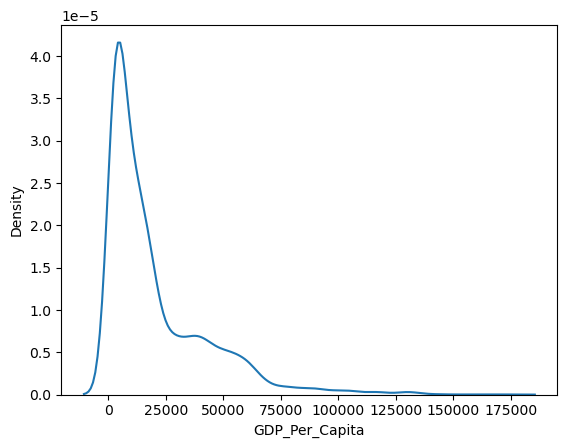

In [14]:
sns.kdeplot(gdp_df['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

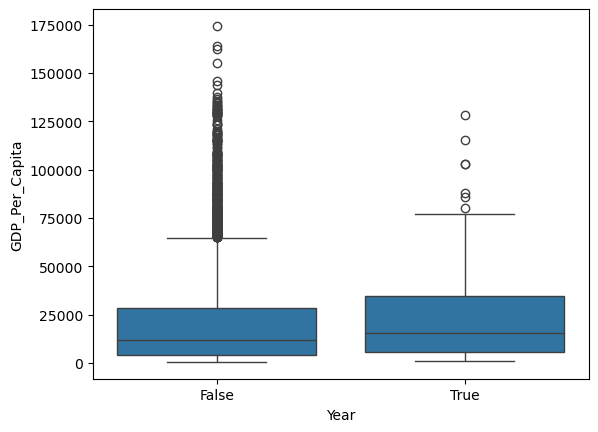

In [15]:
sns.boxplot(x=gdp_df["Year"] == 2020, y=gdp_df["GDP_Per_Capita"])

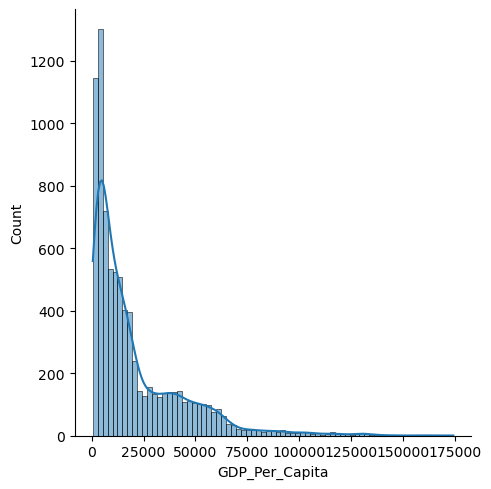

In [16]:
sns.displot(data = gdp_df["GDP_Per_Capita"], kde = True)

not every plot has a slot for both datapoints im looking for the plots all show high density before a severe drop off

In [17]:
gdp_df.describe()

,Year,GDP_Per_Capita
count,8219.000000,8219.000000
mean,2006.672345,20270.976242
std,9.782986,22532.004246
min,1990.000000,510.822823
25%,1998.000000,4284.868430
50%,2007.000000,11916.457927
75%,2015.000000,28543.305542
max,2023.000000,174339.077325


In [18]:
gdp_year = gdp_df[gdp_df['Year'] == 2020]['GDP_Per_Capita']

In [19]:
gdp_year.median()

15309.23598817024

10) For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn

In [20]:
years = [1990,2000,2010,2020]
gdp_decades = gdp_df[gdp_df['Year'].isin(years)]

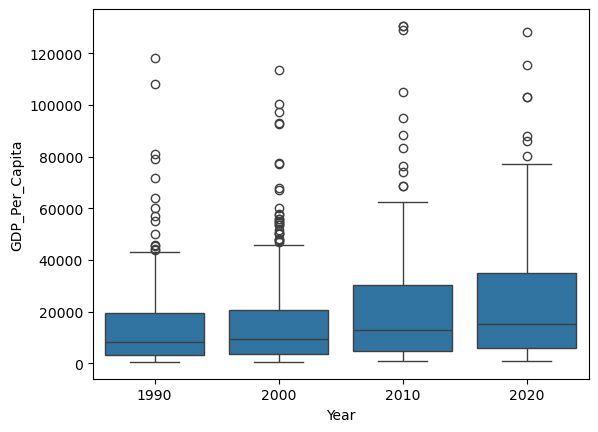

In [21]:
sns.boxplot(x=gdp_decades['Year'],y='GDP_Per_Capita', data=gdp_decades)
plt.show()

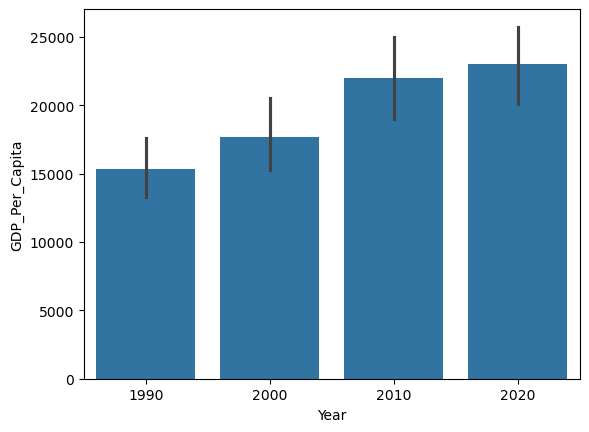

In [22]:
sns.barplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)
plt.show()

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

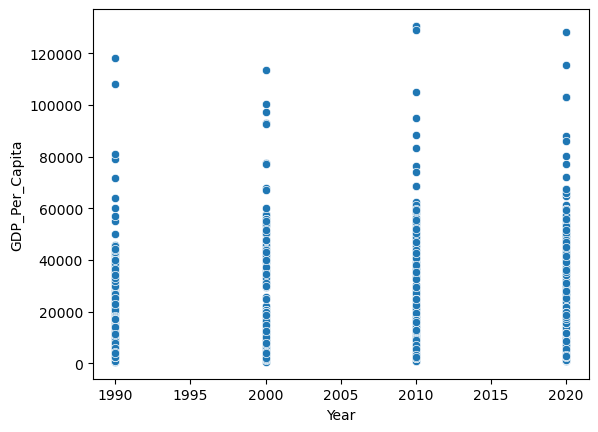

In [23]:
sns.scatterplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

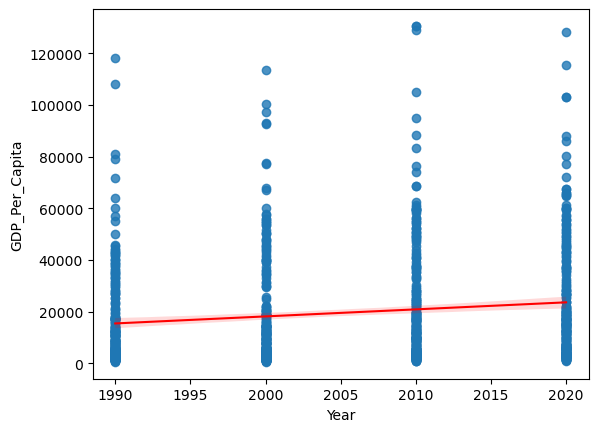

In [24]:
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], line_kws={"color":"red", "linewidth": 1.5})
plt.show()

gdp rose slightly. barplot shows data best, while the trend line gives a good visual


In [25]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [26]:
threshold = 100000

In [27]:
over_thresh = gdp_df[gdp_df['GDP_Per_Capita'] > threshold]

In [28]:
over_thresh.sort_values

<bound method DataFrame.sort_values of                    Country  Year  GDP_Per_Capita
750                Bermuda  2011   101174.504104
751                Bermuda  2010   105121.639689
752                Bermuda  2009   108091.644563
753                Bermuda  2008   115015.749469
754                Bermuda  2007   117742.118950
...                    ...   ...             ...
7821  United Arab Emirates  1996   100563.698291
7822  United Arab Emirates  1995   101412.082063
7825  United Arab Emirates  1992   101100.487512
7826  United Arab Emirates  1991   103098.537132
7827  United Arab Emirates  1990   108057.042464

[106 rows x 3 columns]>

united arab emirates in 1990

12) Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [29]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]

In [30]:
gdp_2020.sort_values('GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257
1302,Central African Republic,2020,1136.570530
1734,Dem. Rep. Congo,2020,1277.632863
6699,Somalia,2020,1396.053436
5133,Mozambique,2020,1466.124765
...,...,...,...
741,Bermuda,2020,87894.401174
3493,Ireland,2020,102989.787335
6119,Qatar,2020,103061.913414
6514,Singapore,2020,115304.149459


In [31]:
lux_gdp = gdp_df[gdp_df['Country'] == 'Luxembourg']

In [32]:
lux_gdp.head()

,Country,Year,GDP_Per_Capita
4423,Luxembourg,2023,130373.477942
4424,Luxembourg,2022,134507.667531
4425,Luxembourg,2021,135379.291201
4426,Luxembourg,2020,128256.560341
4427,Luxembourg,2019,131609.099616


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

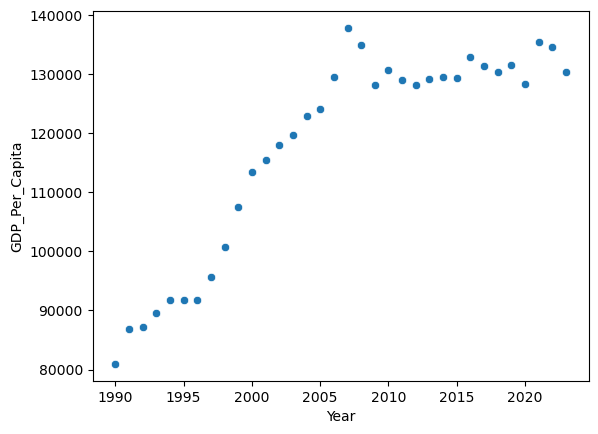

In [33]:
sns.scatterplot(x=lux_gdp["Year"], y=lux_gdp["GDP_Per_Capita"])

13) Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [34]:
gdp_2020.sort_values('GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1046,Burundi,2020,833.920257
1302,Central African Republic,2020,1136.570530
1734,Dem. Rep. Congo,2020,1277.632863
6699,Somalia,2020,1396.053436
5133,Mozambique,2020,1466.124765
...,...,...,...
741,Bermuda,2020,87894.401174
3493,Ireland,2020,102989.787335
6119,Qatar,2020,103061.913414
6514,Singapore,2020,115304.149459


In [35]:
bur_gdp = gdp_df[gdp_df['Country'] == 'Burundi']

In [36]:
bur_gdp.head(5)

,Country,Year,GDP_Per_Capita
1043,Burundi,2023,828.861074
1044,Burundi,2022,829.387160
1045,Burundi,2021,836.665571
1046,Burundi,2020,833.920257
1047,Burundi,2019,855.732720


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

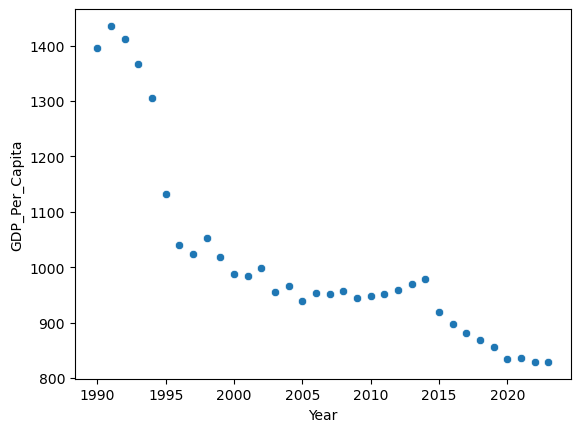

In [37]:
sns.scatterplot(x=bur_gdp["Year"], y=bur_gdp["GDP_Per_Capita"])

no both countries did not have higher gdp in 2020. burundi gdp tanked in 95 and hasnt recoverd

14)Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [38]:
internet_df = pd.read_csv('../data/internet_use.csv',nrows=6083)
internet_df.columns

Index(['Country or Area', 'Year', 'Value', 'Value Footnotes'], dtype='object')

In [39]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


15)Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [40]:
internet_df2 = internet_df.drop(columns = ['Value Footnotes'])

gdp_df = gdp_df.rename(columns = {'Country or Area' : 'Country', 'Year' : 'Year' , 'Value' : 'GDP_Per_Capita'})

In [41]:
internet_df2 = internet_df2.rename(columns = {'Country or Area' : 'Country', 'Year' : 'Year','Value' : 'Internet_Users_Pct'})

16)  Look at the number of observations in this dataset per year. What do you notice?

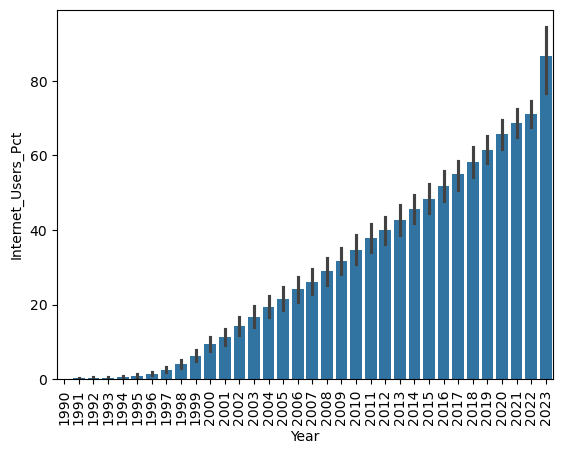

In [42]:
sns.barplot(y='Internet_Users_Pct', x='Year', data=internet_df2)
plt.xticks(rotation=90);

internet percent increased steadily since 97' but shot up drasticly in 23'

17)What is the first year to have a non-zero internet users percentage value?

91 has the first non zero internet percent

18) How does the distribution of internet users percent differ for 2000 and 2014?
figure out internet user percent for 2000 then again for 2014
then subtract one from the other

In [43]:
iup_2000= internet_df2[internet_df2['Year'] == 2000]
iup_2014= internet_df2[internet_df2['Year'] == 2014]

In [44]:
iup_2014['Internet_Users_Pct'].sum()

9303.40467

In [45]:
iup_2014['Internet_Users_Pct'].sum()/iup_2000['Internet_Users_Pct'].sum()*100

474.71171231145075

there was a 475% increase

19)For how many countries was the percentage of internet users below 5% in 2014?

In [46]:
iup_2014[iup_2014['Internet_Users_Pct'] < 5]

,Country,Year,Internet_Users_Pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


20) Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

internet_df, gdp_df

In [47]:
gdp_and_internet_use = pd.merge(internet_df2, gdp_df,on=['Country','Year'], how = 'inner')
gdp_and_internet_use

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
0,Afghanistan,2019,17.600000,2927.245144
1,Afghanistan,2018,16.800000,2902.392113
2,Afghanistan,2017,13.500000,2952.998916
3,Afghanistan,2016,11.000000,2958.785399
4,Afghanistan,2015,8.260000,2967.692067
...,...,...,...,...
4798,Zimbabwe,1997,0.033080,4304.406272
4799,Zimbabwe,1996,0.016790,4271.479930
4800,Zimbabwe,1995,0.007684,3935.280057
4801,Zimbabwe,1994,0.001739,3965.730986


21) .Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [48]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

In [49]:
gdp_and_internet_use_2014

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
5,Afghanistan,2014,7.0000,3017.942544
27,Albania,2014,54.3000,12788.747231
56,Algeria,2014,29.5000,15073.762940
85,Andorra,2014,86.1000,59929.244467
112,Angola,2014,21.3623,10250.592404
...,...,...,...,...
4666,Uzbekistan,2014,35.5000,7145.109807
4695,Vanuatu,2014,18.8000,3320.379187
4723,Viet Nam,2014,41.0000,8751.882806
4751,Zambia,2014,6.5000,3585.577485


In [50]:
top_3_net = gdp_and_internet_use_2014.nlargest(3, 'Internet_Users_Pct')['Country']

In [51]:
top_3_net

1992    Iceland
540     Bermuda
3268     Norway
Name: Country, dtype: object

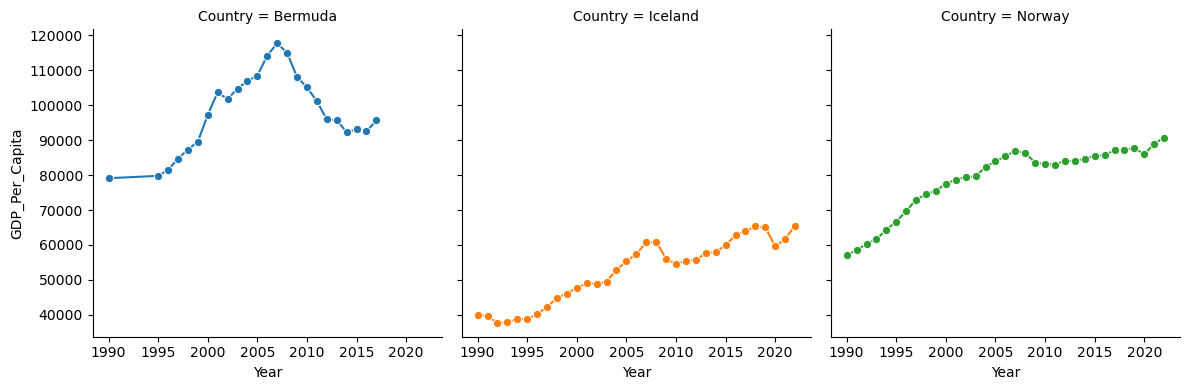

In [52]:
g = sns.FacetGrid(gdp_and_internet_use[gdp_and_internet_use['Country'].isin(top_3_net)],
                  col='Country',hue='Country', col_wrap=3,height=4)
g.map(sns.lineplot, 'Year', 'GDP_Per_Capita',marker= 'o')
plt.show()

bermuda spiked between 2000 to 2005 where as ther others gradually rose higher through the years

22)Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [53]:
gdp_and_internet_use_2014

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
5,Afghanistan,2014,7.0000,3017.942544
27,Albania,2014,54.3000,12788.747231
56,Algeria,2014,29.5000,15073.762940
85,Andorra,2014,86.1000,59929.244467
112,Angola,2014,21.3623,10250.592404
...,...,...,...,...
4666,Uzbekistan,2014,35.5000,7145.109807
4695,Vanuatu,2014,18.8000,3320.379187
4723,Viet Nam,2014,41.0000,8751.882806
4751,Zambia,2014,6.5000,3585.577485


23) Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them

gdp_and_internet_use_2014

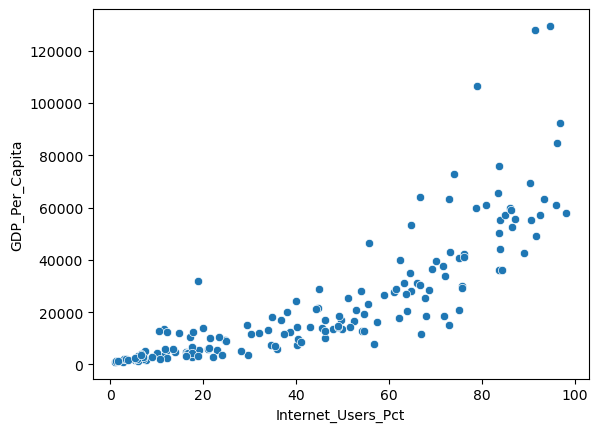

In [54]:
sns.scatterplot(data= gdp_and_internet_use_2014, x="Internet_Users_Pct", y= "GDP_Per_Capita");

there seem to be 4 points out of sync with the common groupings being far away from others close in their category

24) Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".


In [55]:
gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'],q=3,labels=["Low", "Medium", "High"])

C:\Users\Geraden\AppData\Local\Temp\ipykernel_62692\2656240832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_group'] = pd.qcut(gdp_and_internet_use_2014['GDP_Per_Capita'],q=3,labels=["Low", "Medium", "High"])


In [56]:
gdp_and_internet_use_2014.head()

,Country,Year,Internet_Users_Pct,GDP_Per_Capita,GDP_group
5,Afghanistan,2014,7.0000,3017.942544,Low
27,Albania,2014,54.3000,12788.747231,Medium
56,Algeria,2014,29.5000,15073.762940,Medium
85,Andorra,2014,86.1000,59929.244467,High
112,Angola,2014,21.3623,10250.592404,Medium


25) How does the median internet users percentage compare for the three gdp groups?

In [57]:
gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()


C:\Users\Geraden\AppData\Local\Temp\ipykernel_62692\4206467266.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gdp_and_internet_use_2014.groupby('GDP_group')['Internet_Users_Pct'].median()


GDP_group
Low       11.4000
Medium    45.5904
High      76.1603
Name: Internet_Users_Pct, dtype: float64